In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df= pd.read_csv("Kodlasam@nobel.csv")

In [29]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


#  1-Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.

In [4]:
top_10 = df["birth_country"].value_counts().head(10)
print("En Çok Nobel Alan On Ülke")
print(top_10)

En Çok Nobel Alan On Ülke
birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64


# 2-Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [12]:
female_winners = df[df['sex'] == 'Female'][['year', 'full_name']].sort_values(by='year', ascending=True)
print(female_winners)

     year                                          full_name
19   1903                        Marie Curie, née Sklodowska
29   1905  Baroness Bertha Sophie Felicita von Suttner, n...
51   1909                      Selma Ottilia Lovisa Lagerlöf
62   1911                        Marie Curie, née Sklodowska
128  1926                                     Grazia Deledda
141  1928                                      Sigrid Undset
160  1931                                        Jane Addams
179  1935                                 Irène Joliot-Curie
198  1938                                         Pearl Buck
218  1945                                   Gabriela Mistral
229  1946                                 Emily Greene Balch
235  1947                    Gerty Theresa Cori, née Radnitz
351  1963                               Maria Goeppert Mayer
353  1964                           Dorothy Crowfoot Hodgkin
372  1966                                        Nelly Sachs
468  1976               

# 3- Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [13]:
male_winners = df[df['sex'] == 'Male'][['year', 'full_name']].sort_values(by='year', ascending=True)
print(male_winners)

     year                     full_name
0    1901  Jacobus Henricus van 't Hoff
1    1901               Sully Prudhomme
2    1901        Emil Adolf von Behring
3    1901             Jean Henry Dunant
4    1901                Frédéric Passy
..    ...                           ...
905  2016                     Bob Dylan
906  2016              Yoshinori Ohsumi
907  2016            Juan Manuel Santos
908  2016             David J. Thouless
910  2016         J. Michael Kosterlitz

[836 rows x 2 columns]


# SORU 4-Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

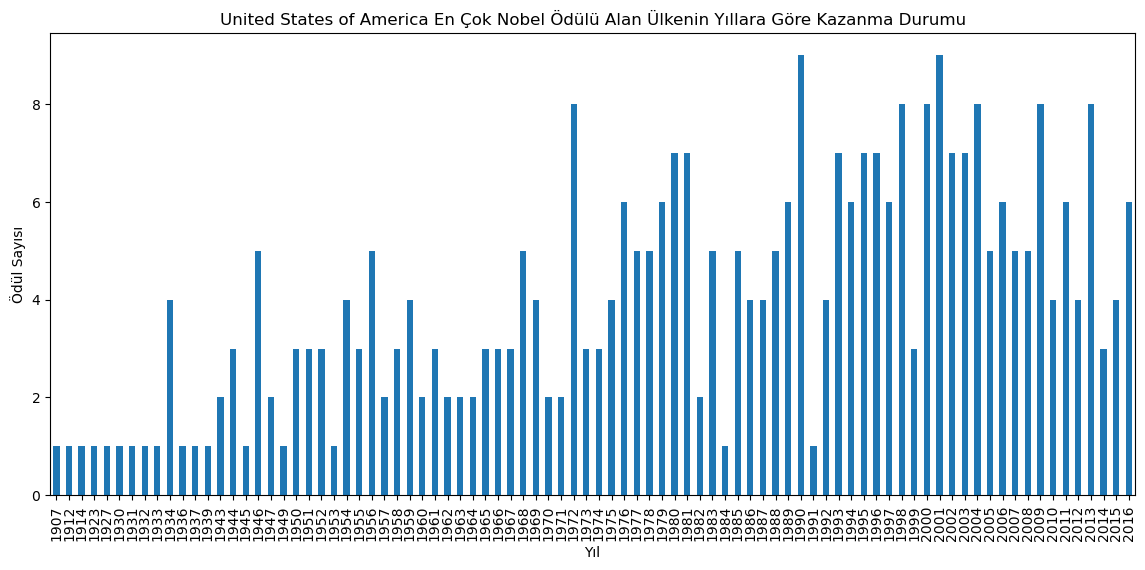

In [6]:
df= pd.read_csv("Kodlasam@nobel.csv")
top_country = df["organization_country"].value_counts().idxmax()

top_country_data = df[df["organization_country"] == top_country]

grouped_data_year = top_country_data.groupby('year').size()

plt.figure(figsize=(14, 6))
grouped_data_year.plot(kind='bar')
plt.title(f"{top_country} En Çok Nobel Ödülü Alan Ülkenin Yıllara Göre Kazanma Durumu")
plt.xlabel("Yıl")
plt.ylabel("Ödül Sayısı")
plt.show()

In [ ]:
# Nobelde en çok Nobel Ödülü kazanan ilk ülke 1. sorudada çıktısını gördüğümüz gibi 259 sayı ile Amerika'dır.Amerika'da kazanılan 
# Nobel ödüllerinin yıllara göre sıralaması tabloda görüldüğü gibidir.
# 1933 yılından sonra gözle görülür yüksek bir artış olmuştur. Bu artış zaman zaman düşsede 1972 yılından sonra yoğun bir artış 
# gözlemlenmiştir. 
# Amerika'da Nobel Ödülü kazanan sayısının fazla olması gelişmiş bilim alt yapısı, geniş çeşitlilik ve büyüklük, cömert 
# araştırma finansmanı ve göçmen bilim insanlarına ev sahiplipi yapmasıdır. Bu faktörler, Amerika'nın birçok farklı alanda
# öncü bilim insanları yetiştirmesine ve Nobel ödülleri kazanmasına katkı sağlamaktadır.

# 5- Nobel Ödülü kazananların cinsiyetlerini, yaşlarını,  ödül kategorisi ve yılları kullanarak görselleştiriniz. Çıkan sonuçlara göre görseli yorumlayınız.

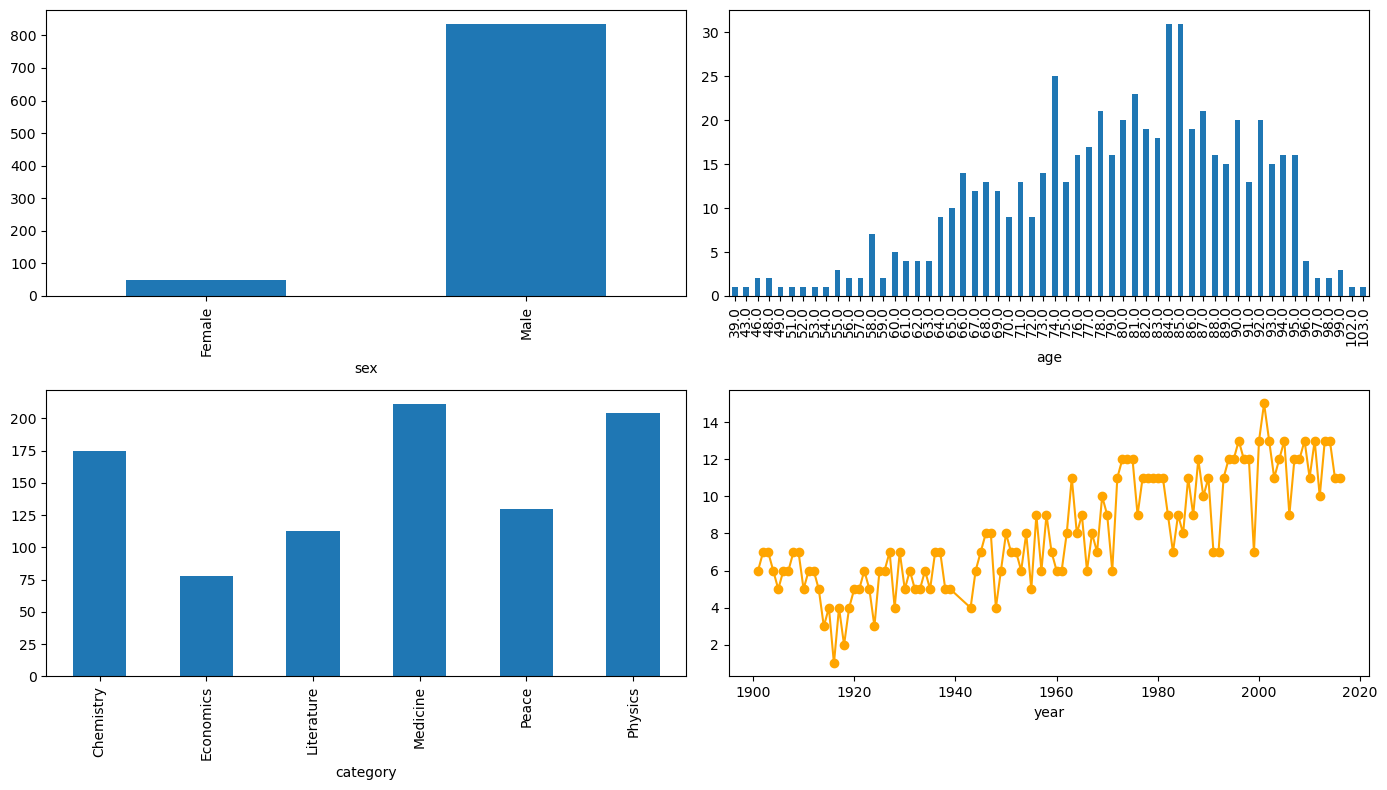

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("Kodlasam@nobel.csv")

df['birth_date_days'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['death_date_days'] = pd.to_datetime(df['death_date'], errors='coerce')
df['age'] = (df['death_date_days'] - df['birth_date_days']).dt.days // 365

grouped_data_sex = df.groupby('sex').size()
grouped_data_age = df.groupby('age').size()
grouped_data_category = df.groupby('category').size()
grouped_data_year = df.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Kategori Dağılımı
plt.subplot(2,2,3)
grouped_data_category.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,4)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()


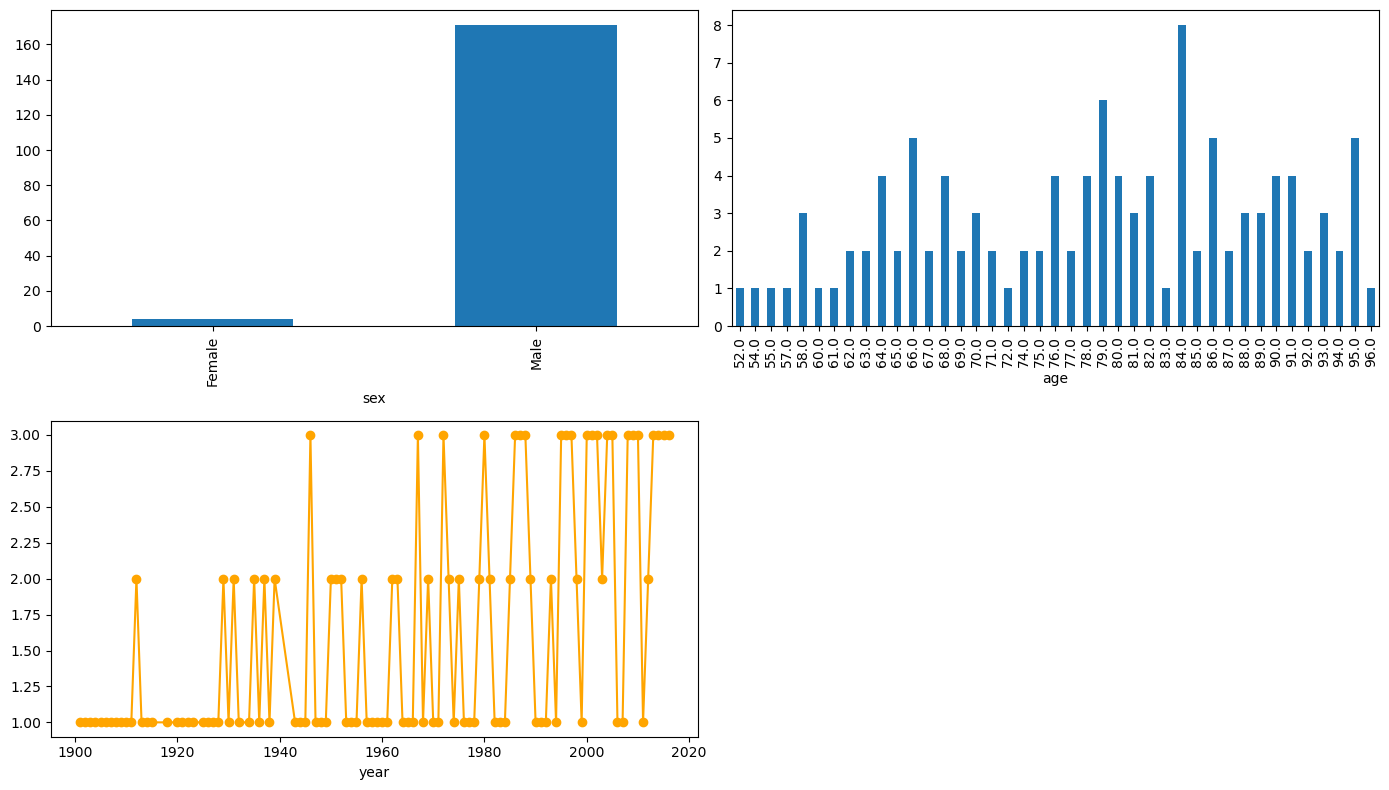

In [18]:

import pandas as pd
import matplotlib.pyplot as plt


df= pd.read_csv("Kodlasam@nobel.csv")

category_chemistry = df[df['category'] == 'Chemistry']
category_economics = df[df['category'] == 'Economics']
category_literature = df[df['category'] == 'Literature']
category_medicine = df[df['category'] == 'Medicine']
category_peace = df[df['category'] == 'Peace']
category_physics = df[df['category'] == 'Physics']


##
data_to_analyze = category_chemistry.copy()

data_to_analyze['birth_date_days'] = pd.to_datetime(data_to_analyze['birth_date'], errors='coerce')
data_to_analyze['death_date_days'] = pd.to_datetime(data_to_analyze['death_date'], errors='coerce')
data_to_analyze['age'] = (data_to_analyze['death_date_days'] - data_to_analyze['birth_date_days']).dt.days // 365

grouped_data_sex = data_to_analyze.groupby('sex').size()
grouped_data_age = data_to_analyze.groupby('age').size()
grouped_data_category = data_to_analyze.groupby('category').size()
grouped_data_year = data_to_analyze.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,3)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()

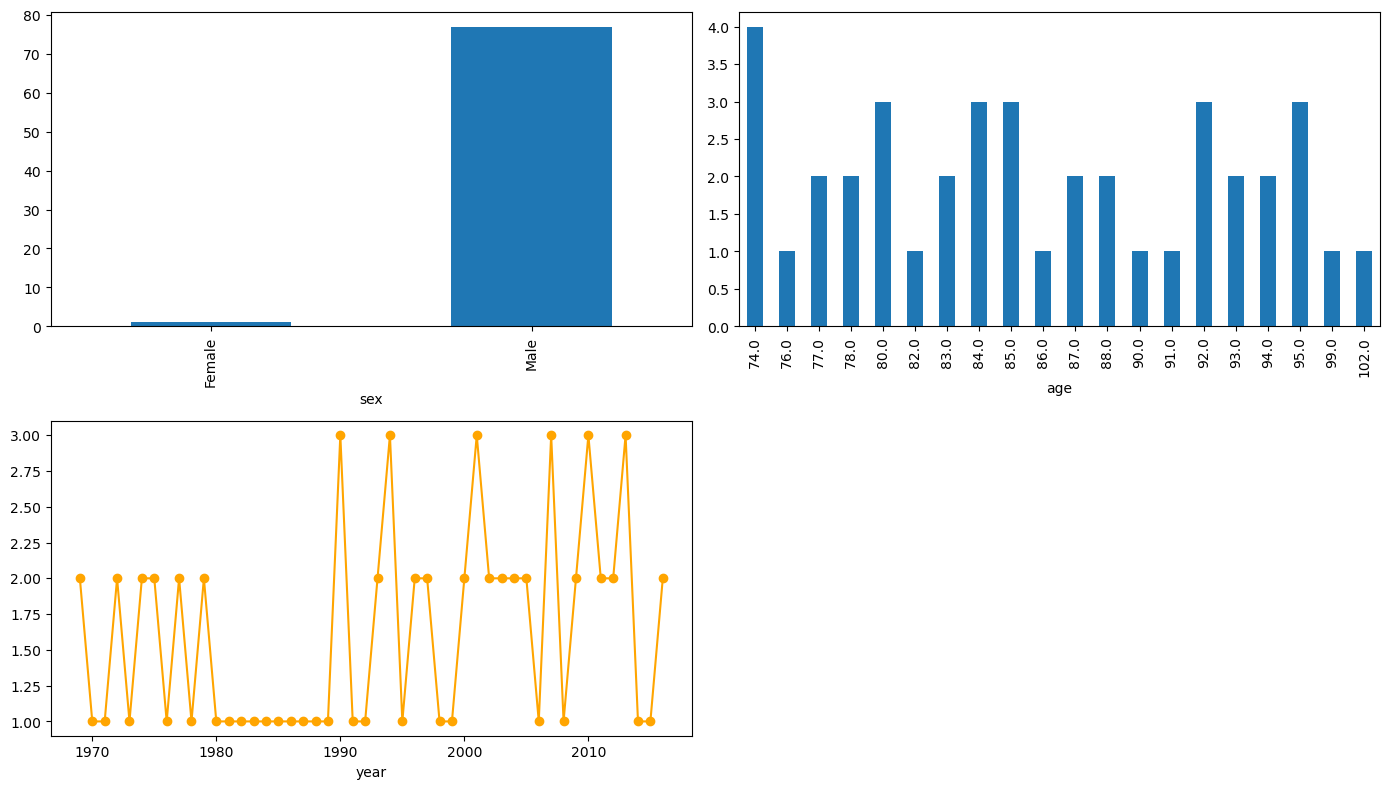

In [20]:
data_to_analyze = category_economics.copy()

data_to_analyze['birth_date_days'] = pd.to_datetime(data_to_analyze['birth_date'], errors='coerce')
data_to_analyze['death_date_days'] = pd.to_datetime(data_to_analyze['death_date'], errors='coerce')
data_to_analyze['age'] = (data_to_analyze['death_date_days'] - data_to_analyze['birth_date_days']).dt.days // 365

grouped_data_sex = data_to_analyze.groupby('sex').size()
grouped_data_age = data_to_analyze.groupby('age').size()
grouped_data_category = data_to_analyze.groupby('category').size()
grouped_data_year = data_to_analyze.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,3)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()

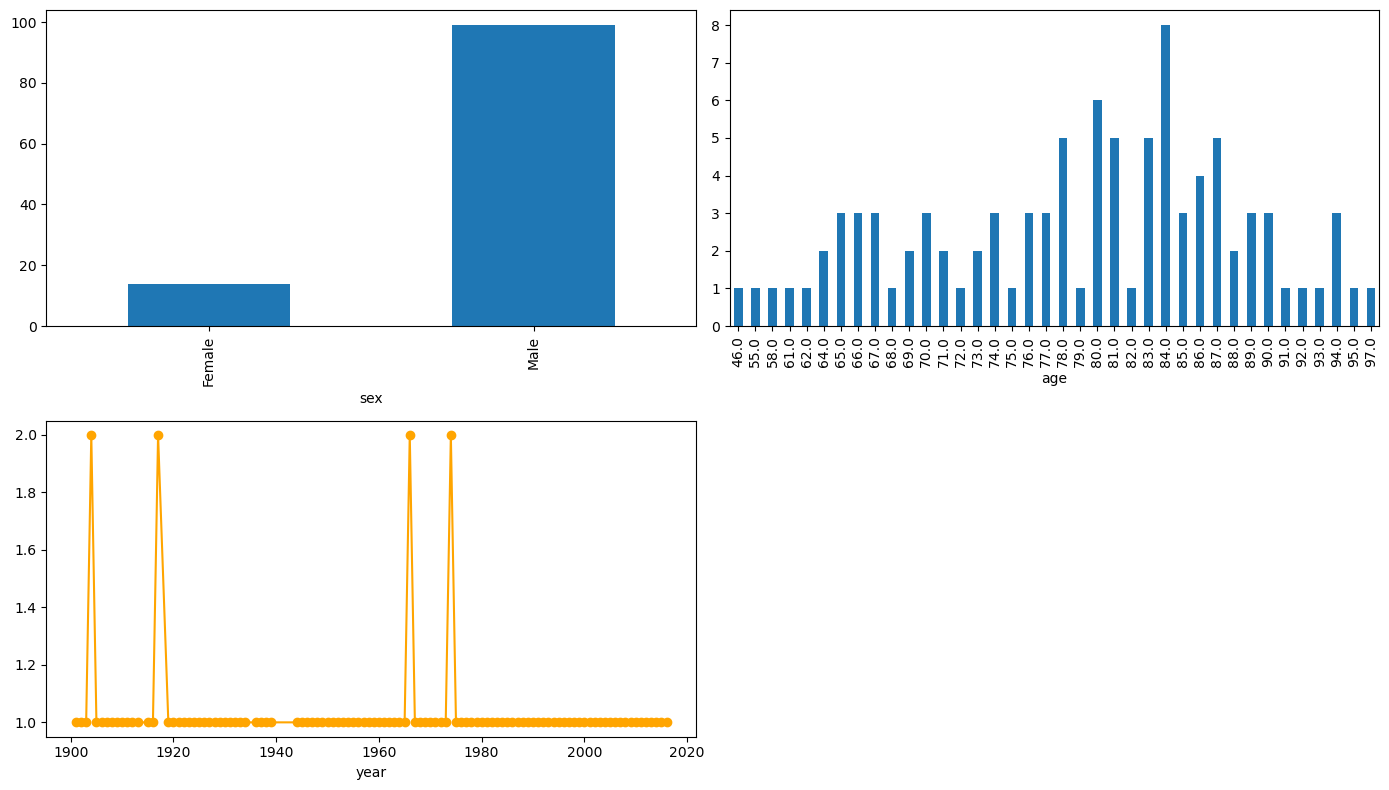

In [21]:
data_to_analyze = category_literature.copy()

data_to_analyze['birth_date_days'] = pd.to_datetime(data_to_analyze['birth_date'], errors='coerce')
data_to_analyze['death_date_days'] = pd.to_datetime(data_to_analyze['death_date'], errors='coerce')
data_to_analyze['age'] = (data_to_analyze['death_date_days'] - data_to_analyze['birth_date_days']).dt.days // 365

grouped_data_sex = data_to_analyze.groupby('sex').size()
grouped_data_age = data_to_analyze.groupby('age').size()
grouped_data_category = data_to_analyze.groupby('category').size()
grouped_data_year = data_to_analyze.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,3)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()

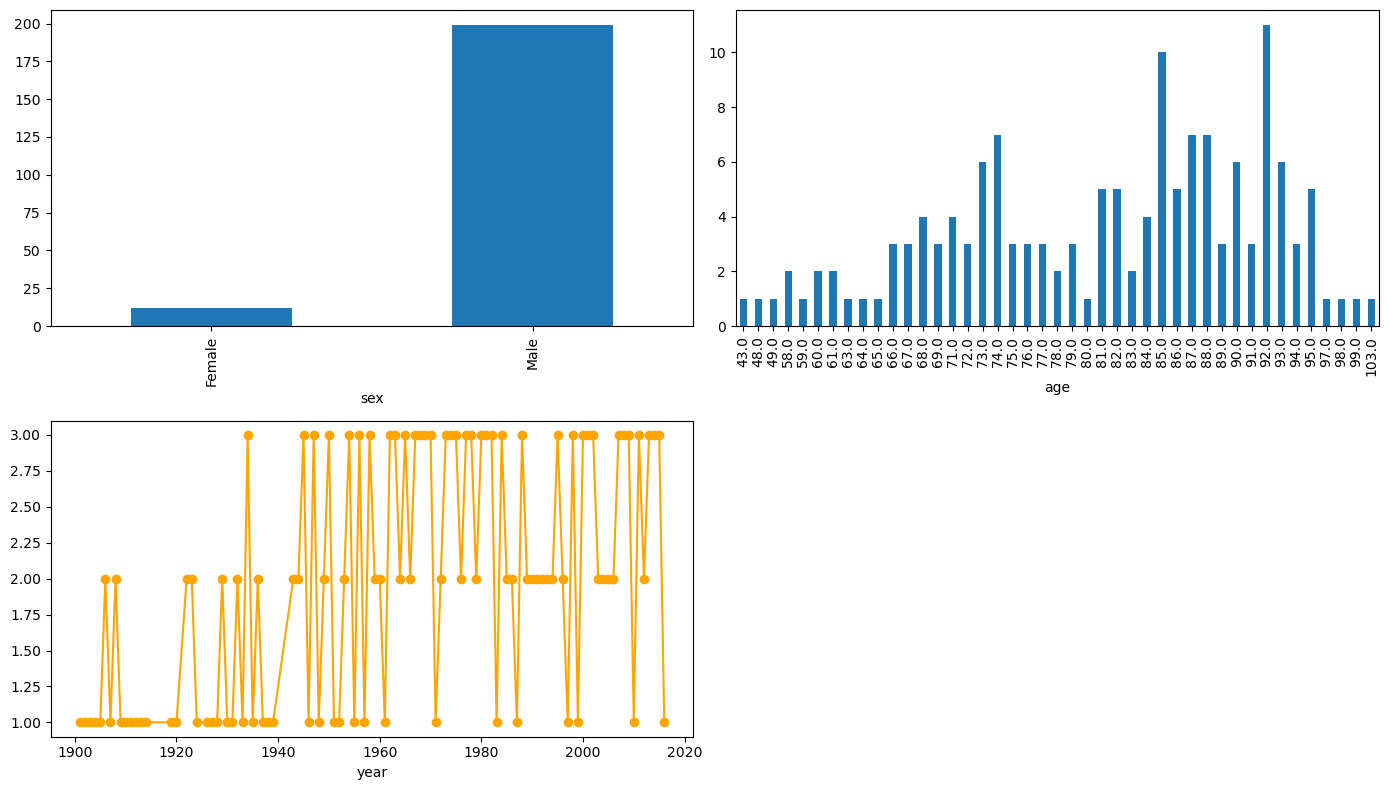

In [23]:
data_to_analyze = category_medicine.copy()

data_to_analyze['birth_date_days'] = pd.to_datetime(data_to_analyze['birth_date'], errors='coerce')
data_to_analyze['death_date_days'] = pd.to_datetime(data_to_analyze['death_date'], errors='coerce')
data_to_analyze['age'] = (data_to_analyze['death_date_days'] - data_to_analyze['birth_date_days']).dt.days // 365

grouped_data_sex = data_to_analyze.groupby('sex').size()
grouped_data_age = data_to_analyze.groupby('age').size()
grouped_data_category = data_to_analyze.groupby('category').size()
grouped_data_year = data_to_analyze.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,3)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()

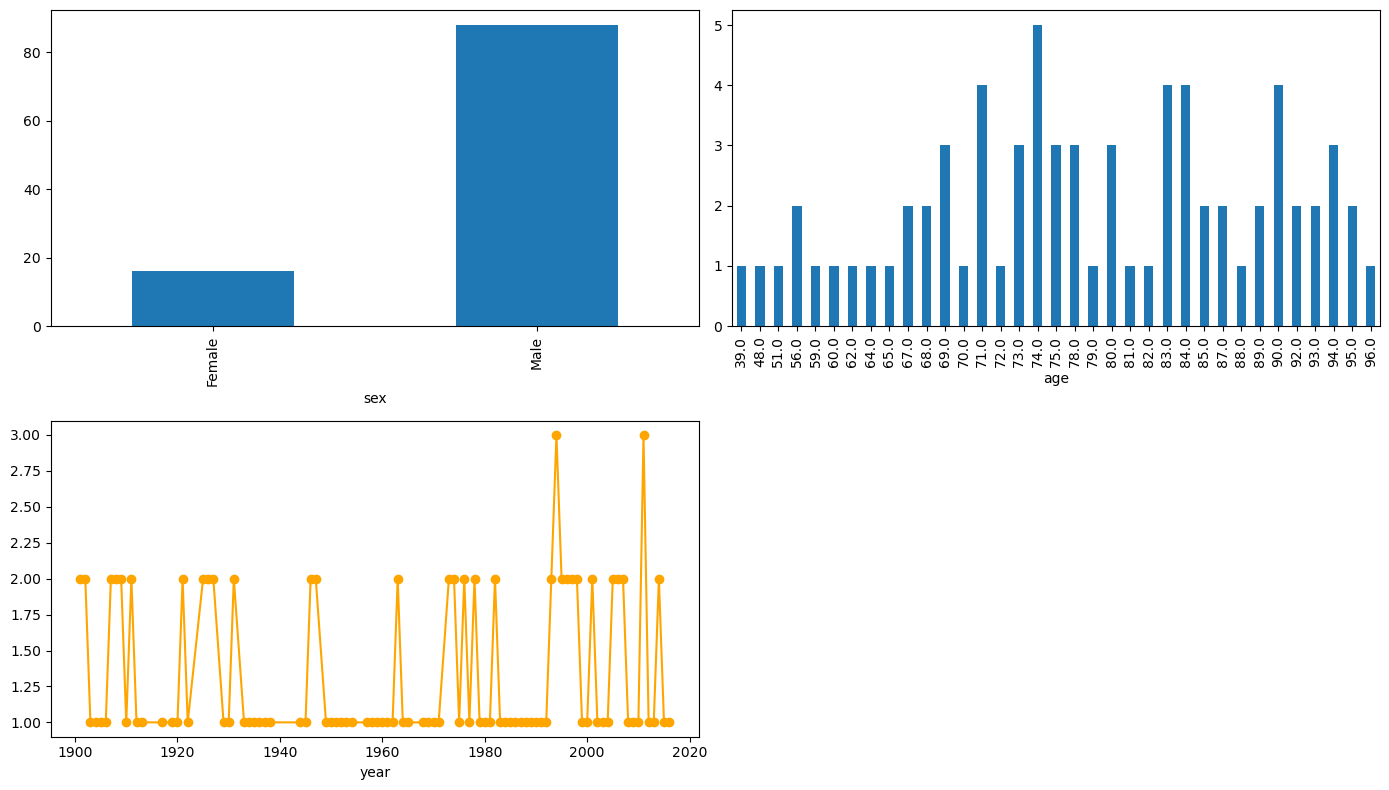

In [24]:
data_to_analyze = category_peace.copy()

data_to_analyze['birth_date_days'] = pd.to_datetime(data_to_analyze['birth_date'], errors='coerce')
data_to_analyze['death_date_days'] = pd.to_datetime(data_to_analyze['death_date'], errors='coerce')
data_to_analyze['age'] = (data_to_analyze['death_date_days'] - data_to_analyze['birth_date_days']).dt.days // 365

grouped_data_sex = data_to_analyze.groupby('sex').size()
grouped_data_age = data_to_analyze.groupby('age').size()
grouped_data_category = data_to_analyze.groupby('category').size()
grouped_data_year = data_to_analyze.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,3)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()

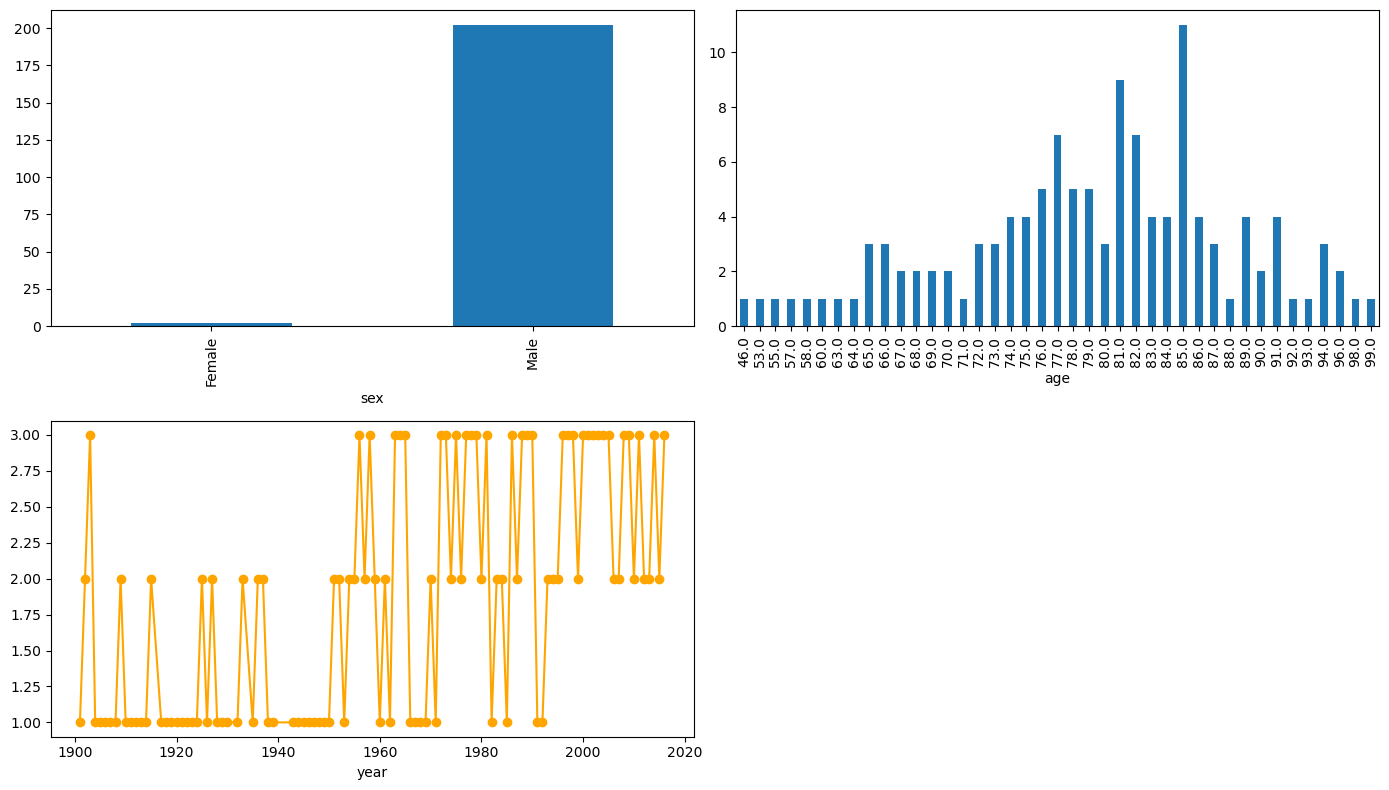

In [25]:
data_to_analyze = category_physics.copy()

data_to_analyze['birth_date_days'] = pd.to_datetime(data_to_analyze['birth_date'], errors='coerce')
data_to_analyze['death_date_days'] = pd.to_datetime(data_to_analyze['death_date'], errors='coerce')
data_to_analyze['age'] = (data_to_analyze['death_date_days'] - data_to_analyze['birth_date_days']).dt.days // 365

grouped_data_sex = data_to_analyze.groupby('sex').size()
grouped_data_age = data_to_analyze.groupby('age').size()
grouped_data_category = data_to_analyze.groupby('category').size()
grouped_data_year = data_to_analyze.groupby('year').size()

# Görselleştirme
plt.figure(figsize=(14, 8))

# Cinsiyet Dağılımı
plt.subplot(2,2,1)
grouped_data_sex.plot(kind='bar')

# Yaş Dağılımı
plt.subplot(2,2,2)
grouped_data_age.plot(kind='bar')

# Ödül yılı Dağılımı
plt.subplot(2,2,3)
grouped_data_year.plot(kind='line', marker='o', color='orange')

plt.tight_layout()
plt.show()

# 6-1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

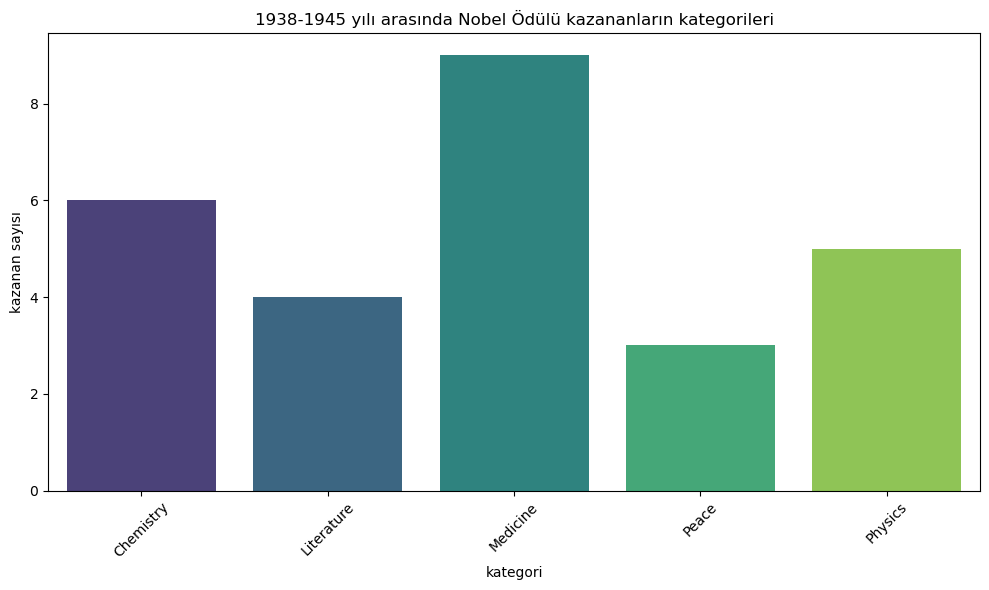

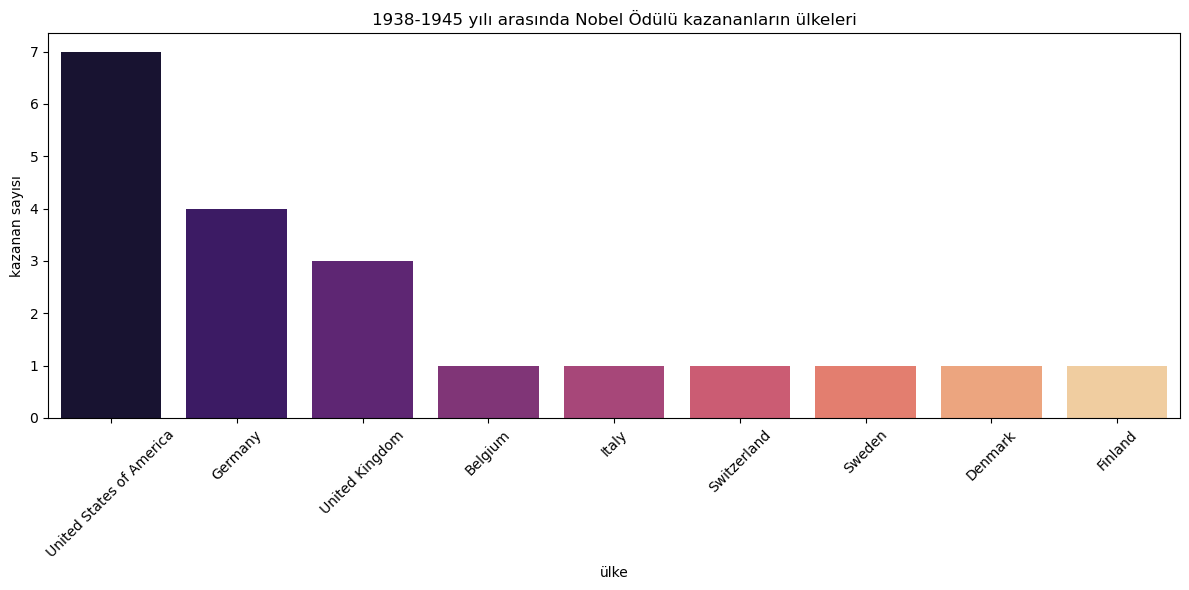

In [42]:

df["year"] = pd.to_datetime(df["year"], format="%Y")

filtered_years = df[(df["year"].dt.year >= 1938) & (df["year"].dt.year <= 1945)]

plt.figure(figsize=(10, 6))
sns.countplot(x="category", data=filtered_years, palette="viridis")
plt.title("1938-1945 yılı arasında Nobel Ödülü kazananların kategorileri")
plt.xlabel("kategori")
plt.ylabel("kazanan sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

plt.figure(figsize=(12, 6))
sns.countplot(x="organization_country", data=filtered_years, palette="magma",
              order=filtered_years["organization_country"].value_counts().index)
plt.title("1938-1945 yılı arasında Nobel Ödülü kazananların ülkeleri")
plt.xlabel("ülke")
plt.ylabel("kazanan sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 1938-1945 yılları arasında Nobel Ödülü kazananların kategori bazında Tıp 1. sırada görülmekte, sıralama olarak 
#Kimya, Fizik, Edebiyat, Barış takip etmektedir
# Ülke sıralamasında Amerika yüksek oranda ödül almştır.

# 7-1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

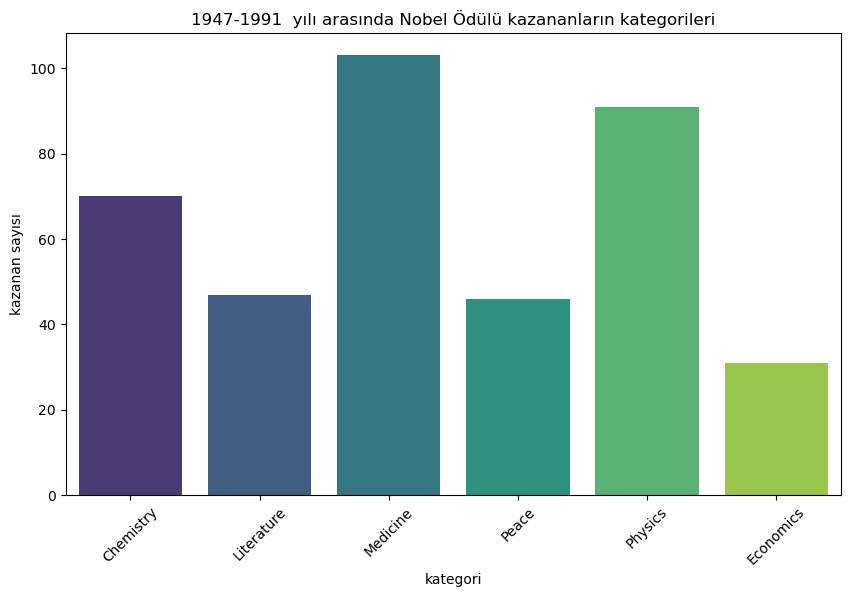

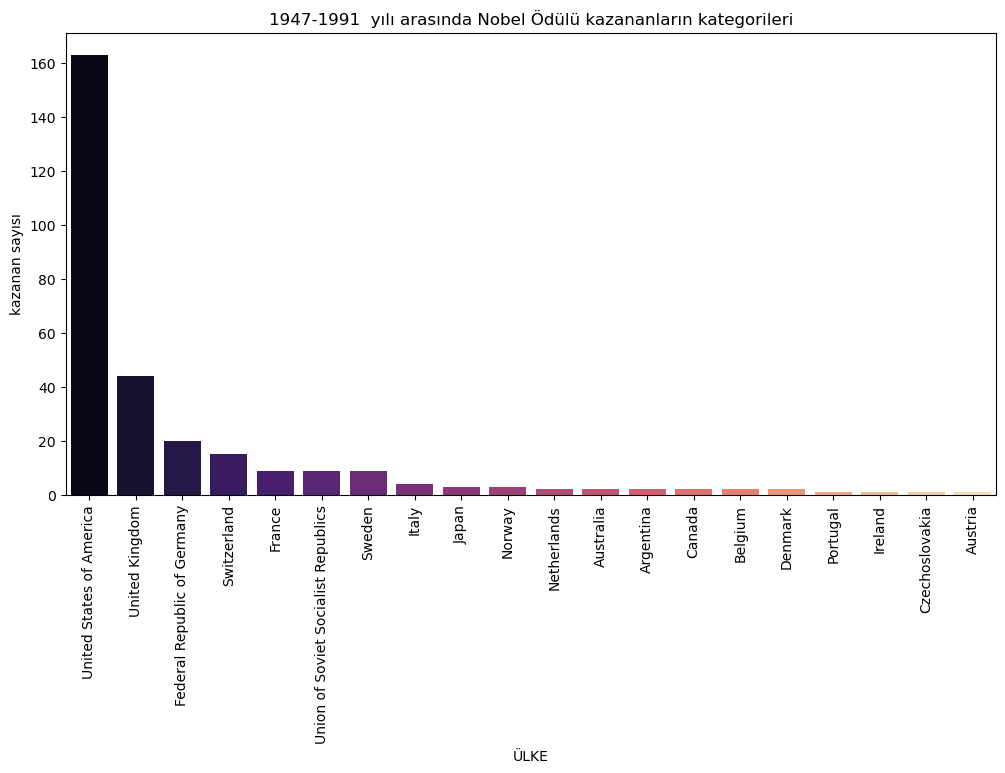

In [40]:
df= pd.read_csv("Kodlasam@nobel.csv")
df["year"] = pd.to_datetime(df["year"], format="%Y")

filtered_years = df[(df["year"].dt.year>=1947) & (df["year"].dt. year<=1991)]

plt.figure(figsize=(10,6))
sns.countplot(x="category", data=filtered_years, palette="viridis")
plt.title("1947-1991  yılı arasında Nobel Ödülü kazananların kategorileri")
plt.xlabel("kategori")
plt.ylabel ("kazanan sayısı")
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="organization_country", data=filtered_years, palette="magma",
              order=filtered_years["organization_country"].value_counts().index)
plt.title("1947-1991  yılı arasında Nobel Ödülü kazananların Ülkeleri")
plt.xlabel("ÜLKE")
plt.ylabel ("kazanan sayısı")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

In [ ]:
# 1947-1991 yılları arasında Nobel Ödülü kazananların kategori bazında Tıp 1. sırada görülmekte, sıralama olarak Fizik,Kimya,
#Edebiyat,Ekonomi takip etmektedir.
# Ülke sıralamasında Amerika yüksek oranda ödül almştır.

# 8- Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin. Veriyi yorumlayınız.

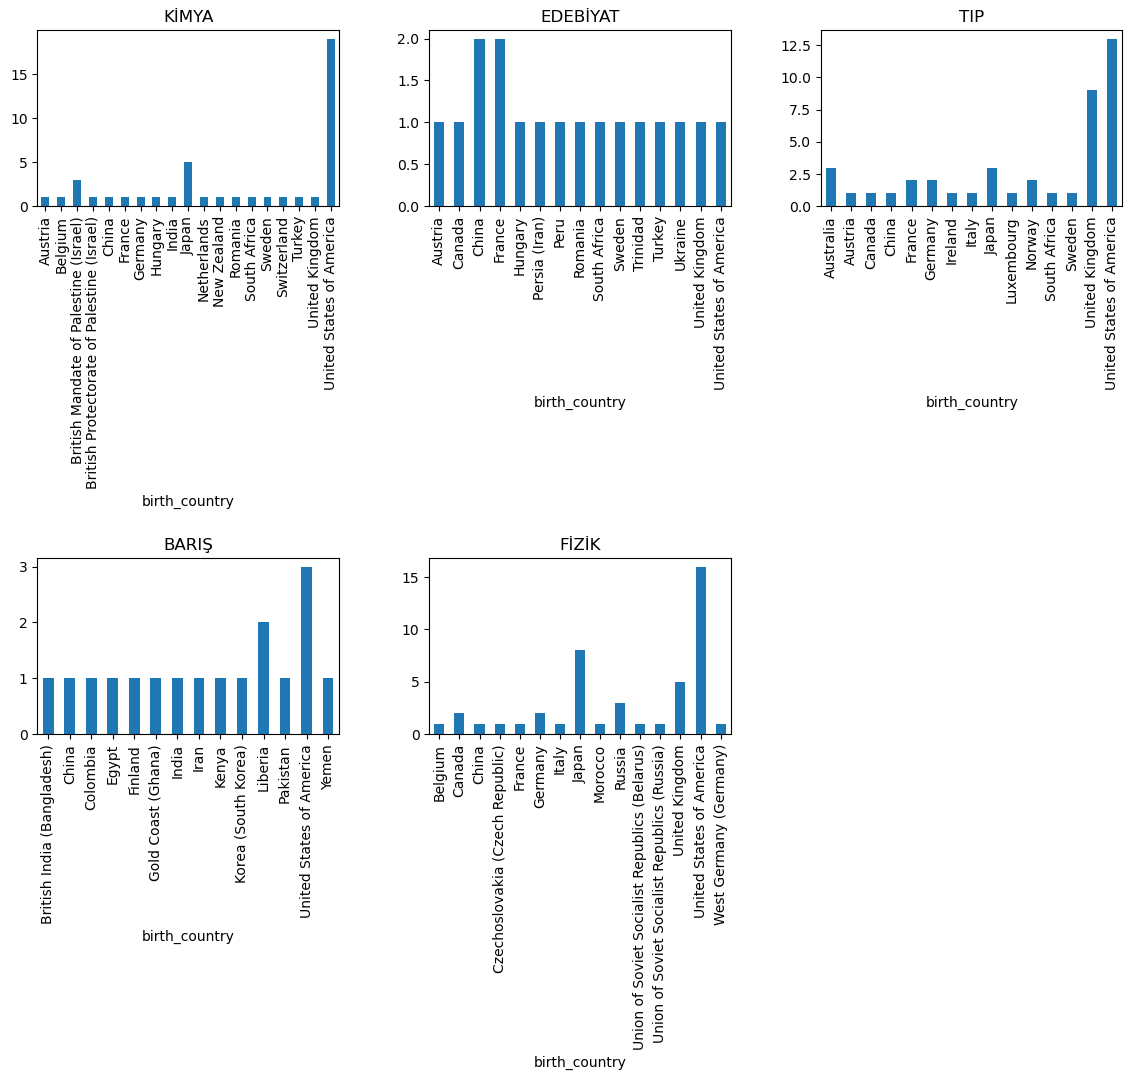

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


df= pd.read_csv("Kodlasam@nobel.csv")

category_chemistry = df[(df['category'] == 'Chemistry')& (df['year'] >= 2000)] 
category_literature = df[(df['category'] == 'Literature')& (df['year'] >= 2000)]
category_medicine = df[(df['category'] == 'Medicine')& (df['year'] >= 2000)]
category_peace = df[(df['category'] == 'Peace')& (df['year'] >= 2000)]
category_physics = df[(df['category'] == 'Physics')& (df['year'] >= 2000)]


##
data_to_analyze = 'birth_country'

group_category_chemistry = category_chemistry.groupby(data_to_analyze).size() 
group_category_literature = category_literature.groupby(data_to_analyze).size() 
group_category_medicine = category_medicine.groupby(data_to_analyze).size() 
group_category_peace = category_peace.groupby(data_to_analyze).size() 
group_category_physics = category_physics.groupby(data_to_analyze).size() 


plt.figure(figsize=(14,16))
plt.subplot(3,3,1)

group_category_chemistry.plot(kind='bar')
plt.title("KİMYA")

plt.subplot(3,3,2)
group_category_literature.plot(kind='bar')
plt.title("EDEBİYAT")

plt.subplot(3,3,3)
group_category_medicine.plot(kind='bar')
plt.title("TIP")


plt.subplot(3,3,4)
group_category_peace.plot(kind='bar')
plt.title("BARIŞ")


plt.subplot(3,3,5)
group_category_physics.plot(kind='bar')
plt.title("FİZİK")



plt.subplots_adjust(wspace=0.3,hspace=2)
plt.show()


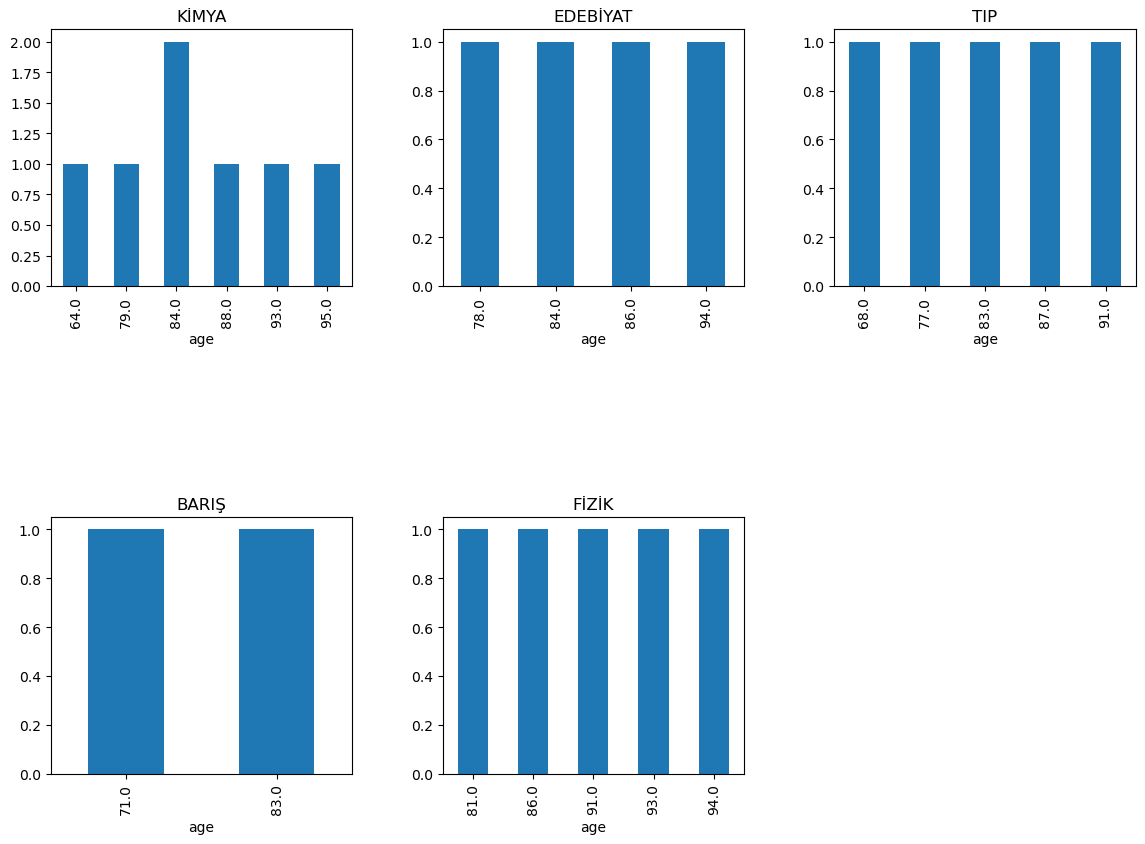

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


df= pd.read_csv("Kodlasam@nobel.csv")


df['birth_date_days'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['death_date_days'] = pd.to_datetime(df['death_date'], errors='coerce')
df['age'] = (df['death_date_days'] - df['birth_date_days']).dt.days // 365

category_chemistry = df[(df['category'] == 'Chemistry')& (df['year'] >= 2000)] 
category_literature = df[(df['category'] == 'Literature')& (df['year'] >= 2000)]
category_medicine = df[(df['category'] == 'Medicine')& (df['year'] >= 2000)]
category_peace = df[(df['category'] == 'Peace')& (df['year'] >= 2000)]
category_physics = df[(df['category'] == 'Physics')& (df['year'] >= 2000)]


##
data_to_analyze = 'age'

group_category_chemistry = category_chemistry.groupby(data_to_analyze).size() 
group_category_literature = category_literature.groupby(data_to_analyze).size() 
group_category_medicine = category_medicine.groupby(data_to_analyze).size() 
group_category_peace = category_peace.groupby(data_to_analyze).size() 
group_category_physics = category_physics.groupby(data_to_analyze).size() 


plt.figure(figsize=(14,16))
plt.subplot(3,3,1)

group_category_chemistry.plot(kind='bar')
plt.title("KİMYA")

plt.subplot(3,3,2)
group_category_literature.plot(kind='bar')
plt.title("EDEBİYAT")

plt.subplot(3,3,3)
group_category_medicine.plot(kind='bar')
plt.title("TIP")


plt.subplot(3,3,4)
group_category_peace.plot(kind='bar')
plt.title("BARIŞ")


plt.subplot(3,3,5)
group_category_physics.plot(kind='bar')
plt.title("FİZİK")



plt.subplots_adjust(wspace=0.3,hspace=0.9)
plt.show()





